# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [11]:
import numpy as np
import pandas as pd
import matplotlib as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [12]:


df = pd.read_csv(r"C:\Users\Tommy\OneDrive - Umich\Documents\MDST\MDST-Tutorial-main\data\states_edu.csv")
print(df)

             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659028.0       715680.0          

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [15]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
    
df.dropna()
df.dropna(subset=['AVG_READING_4_SCORE'], inplace = True)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Reading

How many years of data are logged in our dataset? 

In [15]:
totalyears = df["YEAR"].sum()
print(totalyears)

3433559


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [18]:
df_ = df.set_index('STATE')
MI = df_.loc['MICHIGAN', ["AVG_READING_4_SCORE"]].mean()
OH = df_.loc['OHIO', ["AVG_READING_4_SCORE"]].mean()
print(MI)
print(OH)


AVG_READING_4_SCORE    217.833333
dtype: float64
AVG_READING_4_SCORE    223.181818
dtype: float64


Find the average for your outcome score across all states in 2019

In [20]:
df_ = df.set_index('YEAR')
AVR = df_.loc[2019][["AVG_READING_4_SCORE"]]
AVR.mean()

AVG_READING_4_SCORE    219.792453
dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [21]:
state = df.groupby("STATE")
state["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

AttributeError: module 'matplotlib' has no attribute 'xlabel'

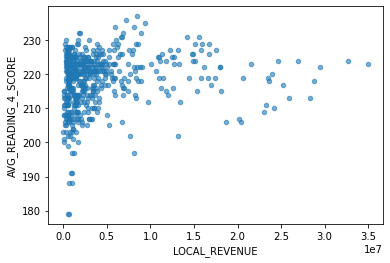

In [22]:
df.plot.scatter(x='LOCAL_REVENUE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Local Revenue')
plt.ylabel('4th Grade Reading Score')

I notice that low revenue has a much greater range in test scores, including the lowest scores, than high revenue, which is consistently high-scoring.

**Visualization 2**

AttributeError: module 'matplotlib' has no attribute 'xlabel'

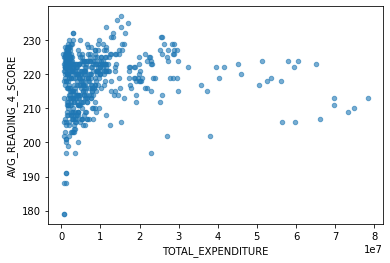

In [23]:
df.plot.scatter(x='TOTAL_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure')
plt.ylabel('4th Grade Reading Score')

Similar to the previous graph; however, a higher expenditure coincides with a more average score than superior score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df[['LOCAL_REVENUE','TOTAL_EXPENDITURE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size= .3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [31]:
 col_name = 'Local Revenue'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('Reading 4 Score')
 plt.title("Model Behavior On Training Set")

TypeError: 'module' object is not callable

In [32]:
 col_name = 'Total Expenditure'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")
 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('Reading 4 Score')
 plt.title("Model Behavior on Testing Set")

TypeError: 'module' object is not callable

<h2> Summary </h2>

Unfortunately, the bulk of my machine learning was unable to process/work; however, I noticed in my early graphs that Local Revenue seemed to have a definite impact towards grade 4 reading scores. The lowest scores with within the poorest areas, while the scores trended upward with more local revenue. On the other hand, I was unable to determine the affect of total expenditure on grade 4 reading scores.